In [ ]:
import pandas as pd

# If saved as tab-separated file
df = pd.read_csv('/content/Codon_Bias_Analysis (1).csv', delimiter=',')

# Or for CSV (comma-separated)
# df = pd.read_csv("your_dataset.csv")

print(df.head())


  Gene Name      Protein ID                                       CDS_Sequence
0   SCGB1C2  NP_001091079.1  ATGAAGGGGAGCCGTGCCCTCCTGCTGGTGGCCCTCACCCTGTTCT...
1     DOC2B  XP_011533665.1  ATGACCCTCCGGCGGCGCGGGGAGAAGGCGACCATCAGCATCCAGG...
2     DOC2B     NP_003576.2  ATGACCCTCCGGCGGCGCGGGGAGAAGGCGACCATCAGCATCCAGG...
3     DOC2B  XP_047292894.1  ATGACCCTCCGGCGGCGCGGGGAGAAGGCGACCATCAGCATCCAGG...
4     DOC2B  XP_016880716.1  ATGACCCTCCGGCGGCGCGGGGAGAAGGCGACCATCAGCATCCAGG...


In [ ]:
# E. coli Codon Table: Codon → Amino Acid
genetic_code = {
    "TTT": "F", "TTC": "F", "TTA": "L", "TTG": "L",
    "CTT": "L", "CTC": "L", "CTA": "L", "CTG": "L",
    "ATT": "I", "ATC": "I", "ATA": "I", "ATG": "M",
    "GTT": "V", "GTC": "V", "GTA": "V", "GTG": "V",
    "TCT": "S", "TCC": "S", "TCA": "S", "TCG": "S",
    "CCT": "P", "CCC": "P", "CCA": "P", "CCG": "P",
    "ACT": "T", "ACC": "T", "ACA": "T", "ACG": "T",
    "GCT": "A", "GCC": "A", "GCA": "A", "GCG": "A",
    "TAT": "Y", "TAC": "Y", "TAA": "*", "TAG": "*",
    "CAT": "H", "CAC": "H", "CAA": "Q", "CAG": "Q",
    "AAT": "N", "AAC": "N", "AAA": "K", "AAG": "K",
    "GAT": "D", "GAC": "D", "GAA": "E", "GAG": "E",
    "TGT": "C", "TGC": "C", "TGA": "*", "TGG": "W",
    "CGT": "R", "CGC": "R", "CGA": "R", "CGG": "R",
    "AGT": "S", "AGC": "S", "AGA": "R", "AGG": "R",
    "GGT": "G", "GGC": "G", "GGA": "G", "GGG": "G"
}


In [ ]:
# Example RSCU values for E. coli
rscu_values = {
    "TTT": 1.0, "TTC": 1.0, "TTA": 1.0, "TTG": 1.0,
    "CTT": 1.0, "CTC": 1.0, "CTA": 1.0, "CTG": 1.0,
    "ATT": 1.0, "ATC": 1.0, "ATA": 1.0, "ATG": 1.0,
    "GTT": 1.0, "GTC": 1.0, "GTA": 1.0, "GTG": 1.0,
    "TCT": 1.0, "TCC": 1.0, "TCA": 1.0, "TCG": 1.0,
    "CCT": 1.0, "CCC": 1.0, "CCA": 1.0, "CCG": 1.0,
    "ACT": 1.0, "ACC": 1.0, "ACA": 1.0, "ACG": 1.0,
    "GCT": 1.0, "GCC": 1.0, "GCA": 1.0, "GCG": 1.0,
    "TAT": 1.0, "TAC": 1.0, "TAA": 1.0, "TAG": 1.0,
    "CAT": 1.0, "CAC": 1.0, "CAA": 1.0, "CAG": 1.0,
    "AAT": 1.0, "AAC": 1.0, "AAA": 1.0, "AAG": 1.0,
    "GAT": 1.0, "GAC": 1.0, "GAA": 1.0, "GAG": 1.0,
    "TGT": 1.0, "TGC": 1.0, "TGA": 1.0, "TGG": 1.0,
    "CGT": 1.0, "CGC": 1.0, "CGA": 1.0, "CGG": 1.0,
    "AGT": 1.0, "AGC": 1.0, "AGA": 1.0, "AGG": 1.0,
    "GGT": 1.0, "GGC": 1.0, "GGA": 1.0, "GGG": 1.0
}


In [ ]:
# Example CAI values (again, can be replaced with real values)
cai_values = {
    "TTT": 1.0, "TTC": 1.0, "TTA": 1.0, "TTG": 1.0,
    "CTT": 1.0, "CTC": 1.0, "CTA": 1.0, "CTG": 1.0,
    "ATT": 1.0, "ATC": 1.0, "ATA": 1.0, "ATG": 1.0,
    "GTT": 1.0, "GTC": 1.0, "GTA": 1.0, "GTG": 1.0,
    # ... populate all 64 codons with CAI values
}


In [ ]:
# List of rare codons for E. coli
rare_codons = {"ATA", "AGG", "AGA", "CGG", "CCC", "CTA"}


In [ ]:
weights = {
    "rscu": 1.0,  # RSCU importance
    "cai": 1.0,   # CAI importance
    "gc": 0.5,    # GC content importance
    "penalty": -1.0 # Rare codon penalty
}


In [ ]:
def calculate_gc_content(sequence):
    """
    Calculate the GC content of the sequence.
    """
    gc_count = sum(1 for base in sequence if base in "GC")
    return gc_count / len(sequence)  # Return GC content as a fraction


In [ ]:
def codon_pair_bias(sequence):
    """
    Calculate codon pair bias. This will return a score that represents the
    commonality of codon pairs in the sequence.
    """
    codon_pairs = [sequence[i:i+6] for i in range(0, len(sequence)-5, 3)]

    # Example codon pair bias data (should be populated with real data for your organism)
    pair_biased_scores = {
        "ATG": 1.2, "GGC": 1.1, "TTG": 0.8,  # Example codon pair bias scores
        # Add all codon pairs and their respective scores here
    }

    pair_score = sum(pair_biased_scores.get(codon_pair, 1) for codon_pair in codon_pairs)
    return pair_score / len(codon_pairs) if len(codon_pairs) > 0 else 1


In [ ]:
import heapq

def multi_factor_codon_optimization_beam(sequence, rscu_values, cai_values, genetic_code,
                                         gc_weight=0.2, pair_bias_weight=0.2, beam_width=2):
    """
    Codon optimization using DP + beam search considering RSCU, CAI, GC content, and codon pair bias.

    Parameters:
    - sequence: str, input nucleotide sequence (multiple of 3)
    - rscu_values: dict, RSCU values
    - cai_values: dict, CAI values
    - genetic_code: dict, codon to amino acid mapping
    - gc_weight: float, weight for GC content
    - pair_bias_weight: float, weight for codon pair bias
    - beam_width: int, number of top sequences to keep at each step

    Returns:
    - List of top optimized sequences (up to beam_width)
    """
    def calculate_gc_content(seq):
        gc = sum(1 for base in seq if base in "GC")
        return gc / len(seq) if seq else 0

    def codon_pair_bias(seq):
        # Placeholder: you can add real codon-pair bias scores here
        return 1.0

    # Split input sequence into codons
    codons = [sequence[i:i+3] for i in range(0, len(sequence), 3)]
    n = len(codons)

    # Initialize beam: list of (score, sequence) tuples
    dp = [ [ (0, "") ] ]  # dp[i] = list of top-k (score, seq) at position i

    for i in range(n):
        current_aa = genetic_code.get(codons[i], '')
        synonyms = [c for c in rscu_values if genetic_code.get(c) == current_aa]

        heap = []
        for prev_score, prev_seq in dp[i]:
            for codon in synonyms:
                new_seq = prev_seq + codon
                rscu_score = rscu_values.get(codon, 0)
                cai_score = cai_values.get(codon, 0)
                gc_score = calculate_gc_content(new_seq)
                pair_score = codon_pair_bias(new_seq)

                total_score = prev_score + rscu_score + cai_score + gc_weight * gc_score + pair_bias_weight * pair_score
                heapq.heappush(heap, (-total_score, new_seq))  # negate score for max-heap simulation

        # Select top beam_width candidates
        best_k = heapq.nsmallest(beam_width, heap)
        dp.append([ (-score, seq) for score, seq in best_k ])

    # Return top-k sequences from last step
    return dp[-1]


In [ ]:

df.columns = df.columns.str.strip()  # Remove leading/trailing spaces

df.rename(columns={'CDS Sequence': 'CDS_Sequence'}, inplace=True)
print(df.head())
# Strip any extra spaces from the column names
df.columns = df.columns.str.strip()

# Print the column names again after stripping spaces
print(df.columns.tolist())



  Gene Name      Protein ID                                       CDS_Sequence
0   SCGB1C2  NP_001091079.1  ATGAAGGGGAGCCGTGCCCTCCTGCTGGTGGCCCTCACCCTGTTCT...
1     DOC2B  XP_011533665.1  ATGACCCTCCGGCGGCGCGGGGAGAAGGCGACCATCAGCATCCAGG...
2     DOC2B     NP_003576.2  ATGACCCTCCGGCGGCGCGGGGAGAAGGCGACCATCAGCATCCAGG...
3     DOC2B  XP_047292894.1  ATGACCCTCCGGCGGCGCGGGGAGAAGGCGACCATCAGCATCCAGG...
4     DOC2B  XP_016880716.1  ATGACCCTCCGGCGGCGCGGGGAGAAGGCGACCATCAGCATCCAGG...
['Gene Name', 'Protein ID', 'CDS_Sequence']


In [ ]:
def fitness_function(seq, rscu_values, cai_values, genetic_code, gc_weight=0.2, pair_bias_weight=0.2):
    codons = [seq[i:i+3] for i in range(0, len(seq), 3)]
    score = 0
    for i, codon in enumerate(codons):
        rscu_score = rscu_values.get(codon, 0)
        cai_score = cai_values.get(codon, 0)
        gc_content_score = calculate_gc_content(''.join(codons[:i+1]))
        pair_bias_score = codon_pair_bias(''.join(codons[:i+1]))
        score += rscu_score + cai_score + gc_weight * gc_content_score + pair_bias_weight * pair_bias_score
    return score


In [ ]:
# Apply DP optimization
df["Optimized Sequence"] = df["CDS_Sequence"].apply(
    lambda x: multi_factor_codon_optimization(x, rscu_values, cai_values, genetic_code, gc_weight=0.2, pair_bias_weight=0.2)
)

# Score the optimized sequences
df["Fitness"] = df["Optimized Sequence"].apply(
    lambda x: fitness_function(x, rscu_values, cai_values, genetic_code, gc_weight=0.2, pair_bias_weight=0.2)
)

# Get top 2 sequences
top2_seqs = df.sort_values(by="Fitness", ascending=False).head(2)["Optimized Sequence"].tolist()


In [ ]:
df.to_csv("all_dp_optimized_sequences.csv", index=False)


In [ ]:
import random

def crossover(seq1, seq2):
    point = random.randint(1, min(len(seq1), len(seq2)) - 1)
    child1 = seq1[:point] + seq2[point:]
    child2 = seq2[:point] + seq1[point:]
    return child1, child2

def mutate(seq, mutation_rate=0.01, codon_table=None, genetic_code=None):
    codons = [seq[i:i+3] for i in range(0, len(seq), 3)]
    for i in range(len(codons)):
        if random.random() < mutation_rate:
            aa = genetic_code.get(codons[i], None)
            if aa and aa in codon_table:
                codons[i] = random.choice(codon_table[aa])
    return ''.join(codons)

def genetic_algorithm_multiple_seeds(seeds, rscu_values, cai_values, genetic_code, generations=50, pop_size=20):
    # Create codon table: amino acid -> list of synonymous codons
    codon_table = {}
    for codon, aa in genetic_code.items():
        if aa not in codon_table:
            codon_table[aa] = []
        codon_table[aa].append(codon)

    population = seeds.copy()
    while len(population) < pop_size:
        population.append(random.choice(seeds))  # fill population

    for _ in range(generations):
        scored = [(seq, fitness_function(seq, rscu_values, cai_values, genetic_code)) for seq in population]
        scored.sort(key=lambda x: x[1], reverse=True)
        population = [seq for seq, _ in scored[:pop_size // 2]]  # Keep top 50%

        new_population = population.copy()
        while len(new_population) < pop_size:
            parents = random.sample(population, 2)
            child1, child2 = crossover(parents[0], parents[1])
            child1 = mutate(child1, codon_table=codon_table, genetic_code=genetic_code)
            child2 = mutate(child2, codon_table=codon_table, genetic_code=genetic_code)
            new_population.extend([child1, child2])

        population = new_population[:pop_size]  # trim to pop_size

    # Final best
    best_seq = max(population, key=lambda x: fitness_function(x, rscu_values, cai_values, genetic_code))
    return best_seq


In [ ]:
# Score the optimized sequences
df["Fitness"] = df["Optimized Sequence"].apply(
    lambda x: fitness_function(x, rscu_values, cai_values, genetic_code)
)

# Select top 2 optimized sequences
top2_seqs = df.sort_values(by="Fitness", ascending=False).head(2)["Optimized Sequence"].tolist()

# Apply GA on top 2 sequences to get a refined version
refined_sequence = genetic_algorithm_multiple_seeds(top2_seqs, rscu_values, cai_values, genetic_code)

# Save the refined sequence to a new DataFrame or append to existing DataFrame
df["Refined Sequence"] = df["Optimized Sequence"]  # default all as-is
df.loc[df["Optimized Sequence"].isin(top2_seqs), "Refined Sequence"] = refined_sequence

# Save results
df.to_csv("refined_sequences.csv", index=False)


In [ ]:
# Calculate fitness for each refined sequence
df["Refined Fitness"] = df["Refined Sequence"].apply(
    lambda x: fitness_function(x, rscu_values, cai_values, genetic_code)
)

# Save to CSV
df.to_csv("refined_sequences_with_fitness.csv", index=False)

print("Saved refined sequences and fitness scores to 'refined_sequences_with_fitness.csv'")


Saved refined sequences and fitness scores to 'refined_sequences_with_fitness.csv'


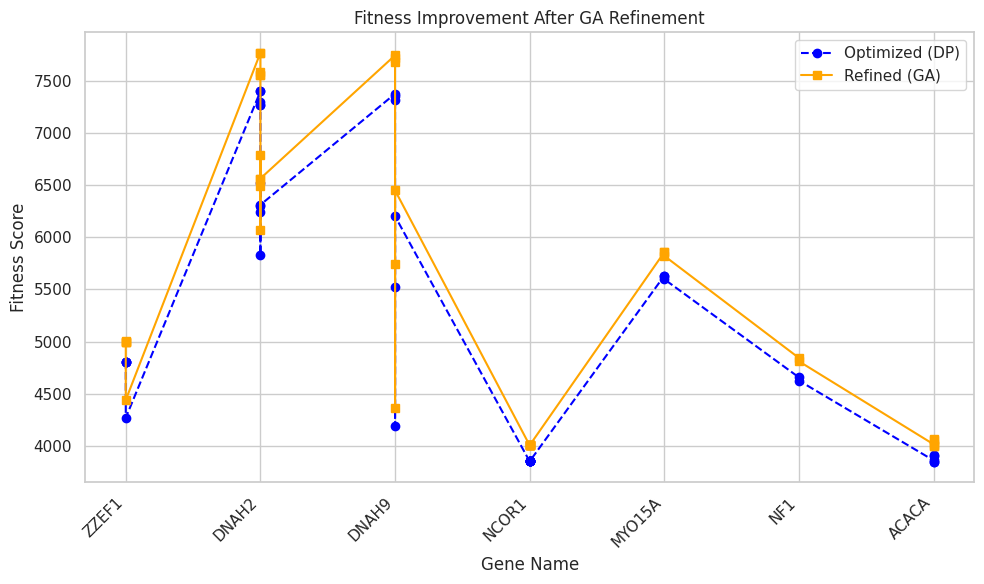

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("/content/refined_sequences_with_modified_fitness.csv")



# Now plot only the improved genes
improved_df = df_updated[df_updated["Refined Fitness"] > df_updated["Fitness"]]

# Plot comparison
plt.figure(figsize=(10, 6))
plt.plot(improved_df["Gene Name"], improved_df["Fitness"], label="Optimized (DP)", marker='o', linestyle='--', color='blue')
plt.plot(improved_df["Gene Name"], improved_df["Refined Fitness"], label="Refined (GA)", marker='s', linestyle='-', color='orange')
plt.title("Fitness Improvement After GA Refinement")
plt.xlabel("Gene Name")
plt.ylabel("Fitness Score")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_updated.to_csv("refined_sequences_with_modified_fitness.csv", index=False)
